# Projet 10 - Détectez des faux billets avec R ou Python

## Sommaire

### Visualisation, exploration et nettoyage des données

In [1]:
#On importe les bibliothèques correspondantes ainsi que le module Re
import numpy as np
import pandas as pd
import seaborn as sns
import re
import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt
import math as mth

#On importe les bibliothèques pour l'ACP
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import LineCollection
from sklearn.preprocessing import scale

#On importe les bibliothèques pour le K-Means
from sklearn.cluster import KMeans

#On importe les bibliothèques pour les régressions linéaires
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels


#### Importation du fichier contenant les données sur les billets

In [2]:
#On importe le fichier CSV correspondant
billets = pd.read_csv("billets.csv", sep = ';')

#### Visualisation et description du dataframe billet

In [3]:
print("Informations du DataFrame billets: \n")
print(billets.info())
print("-----------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------")
print("Affichage du DataFrame billets: \n")
print(billets.head())
print("-----------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------")
print("Description du DataFrame billets: \n")
print(billets.describe())

Informations du DataFrame billets: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB
None
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
Affichage du DataFrame billets: 

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.

On peut supposer qu'il y a 37 valeurs manquantes dans le Dataframe billets pour la colonne margin low.

#### Doublons et valeurs manquantes

In [4]:
print("Nombre de doublons dans billets : \n")
print(billets.duplicated().sum())
print("-----------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------")
print("Nombre de valeurs nulles dans billets : \n")
print(billets.isnull().sum())      

Nombre de doublons dans billets : 

0
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
Nombre de valeurs nulles dans billets : 

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


La présence de 37 valeurs manquantes est confirmée.

#### Recherche d'éventuels outliers (Méthode du Z-Score)

In [5]:
column_list = [billets.is_genuine, billets.diagonal, billets.height_left, billets.height_right, billets.margin_low, billets.margin_up, billets.length]
column_names = ['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
compteur = 0
for column in column_list :
        column_name = column_names[compteur]
        #Calcul du Z-score et liste des outliers
        #On va calculer d'abord...
        threshold = 2 # le seuil
        mean = np.mean(column) # moyenne
        std = np.std(column) # écart-type
        print("La moyenne est de", round(mean, 2), "pour la colonne", column_name, "du Dataframe billets.")
        print("L'écart-type est", round(std, 2), "pour la colonne", column_name, "du Dataframe billets.")
        outlier=[]
        for i in column:
            z = (i-mean)/std
            if z > threshold:
                outlier.append(i)
        # détermination du seuil de prix
        # (x-mean) /std = 2
        # x-mean = 2*std
        # X = 2*std + mean
        seuil = 2*std + mean
        print("Le seuil est de", round(seuil, 3), "pour la colonne", column_name, "du Dataframe billets.")
        print('La liste des outliers est', outlier, "pour la colonne", column_name, "du Dataframe billets.")
        compteur = compteur + 1
        print("-----------------------------------------------------------------------------")
        print("-----------------------------------------------------------------------------")

La moyenne est de 0.67 pour la colonne is_genuine du Dataframe billets.
L'écart-type est 0.47 pour la colonne is_genuine du Dataframe billets.
Le seuil est de 1.609 pour la colonne is_genuine du Dataframe billets.
La liste des outliers est [] pour la colonne is_genuine du Dataframe billets.
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
La moyenne est de 171.96 pour la colonne diagonal du Dataframe billets.
L'écart-type est 0.31 pour la colonne diagonal du Dataframe billets.
Le seuil est de 172.569 pour la colonne diagonal du Dataframe billets.
La liste des outliers est [172.69, 172.69, 172.58, 172.74, 172.76, 172.58, 172.73, 172.58, 172.6, 172.75, 172.57, 172.59, 172.67, 172.62, 172.92, 172.89, 172.61, 172.57, 172.63, 172.89, 172.61, 172.57, 173.01, 172.66, 172.72] pour la colonne diagonal du Dataframe billets.
-------------------------------------------------------------------

#### Visualisation des outliers (Box plot)

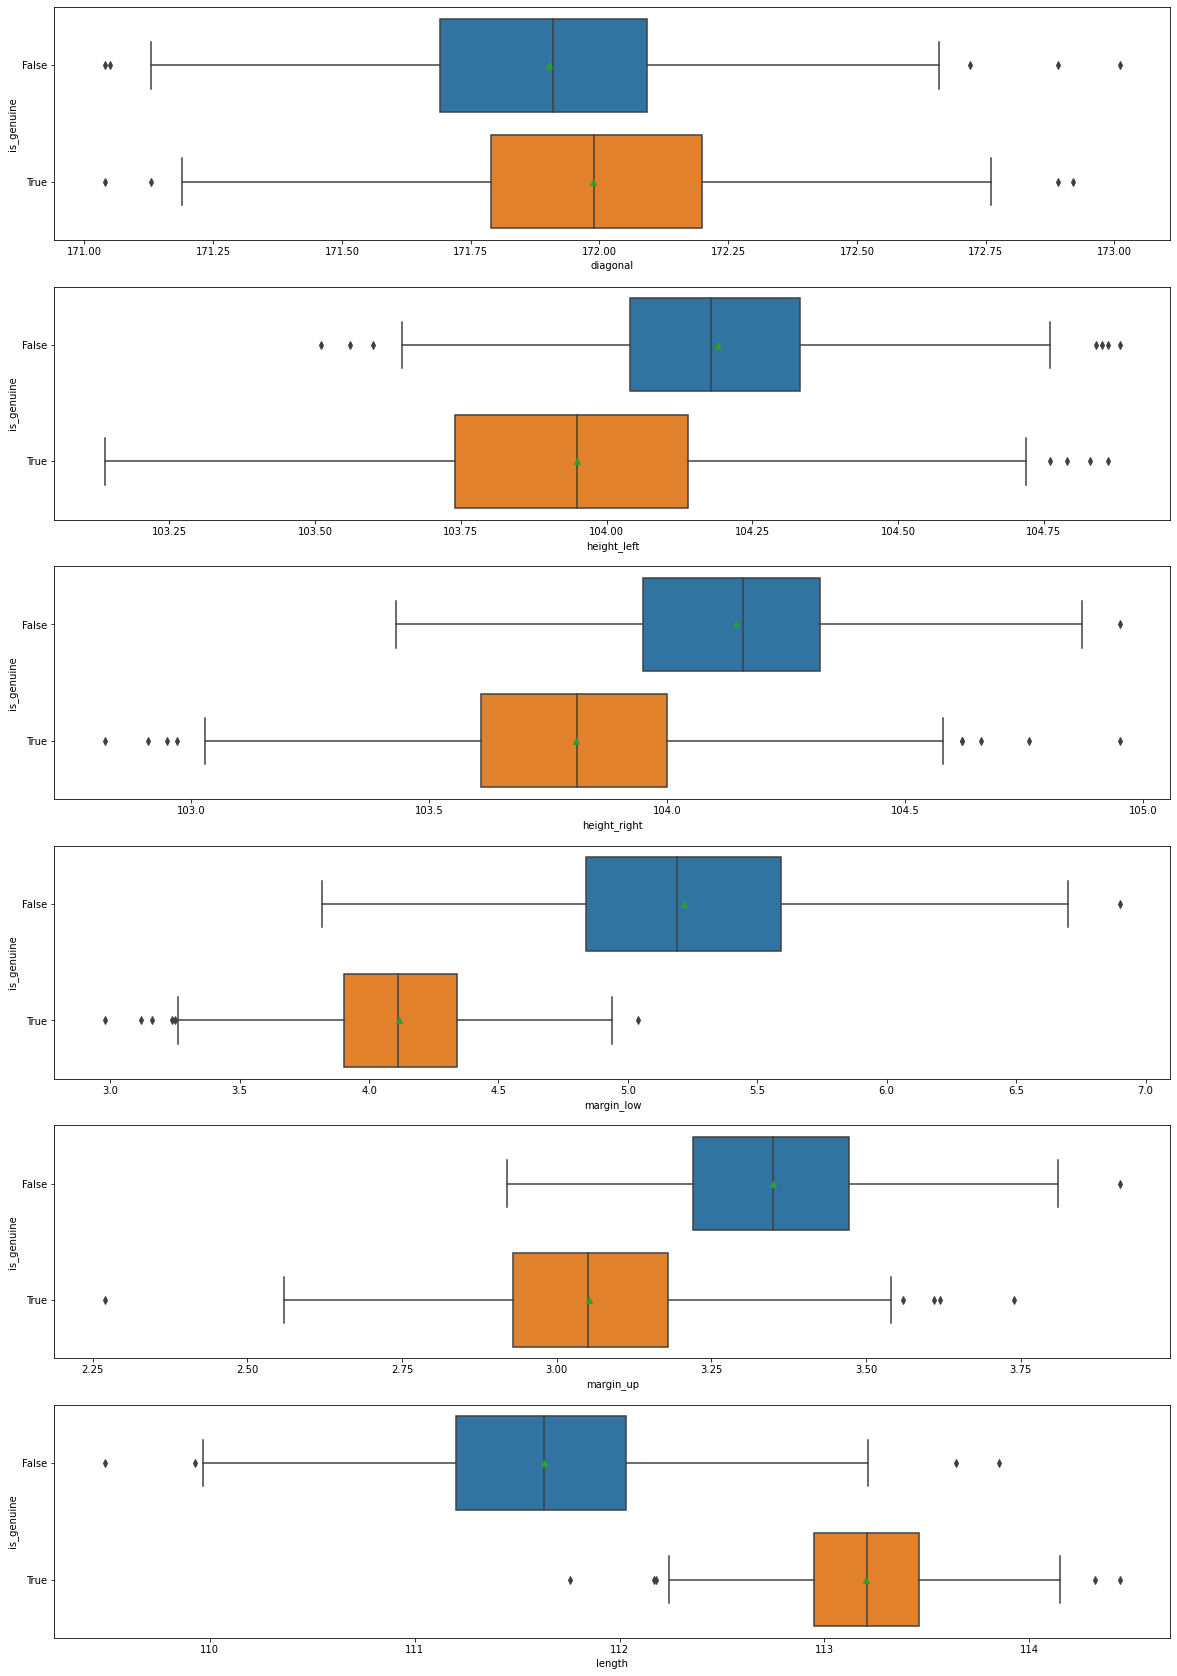

In [6]:
plt.figure(figsize=(20, 30))

plt.subplot(611)
sns.boxplot(data=billets, x='diagonal', y='is_genuine', orient='h', showfliers=True, showmeans=True)
plt.subplot(612)
sns.boxplot(data=billets, x='height_left', y='is_genuine', orient='h', showfliers=True, showmeans=True)
plt.subplot(613)
sns.boxplot(data=billets, x='height_right', y='is_genuine', orient='h', showfliers=True, showmeans=True)
plt.subplot(614)
sns.boxplot(data=billets, x='margin_low', y='is_genuine', orient='h', showfliers=True, showmeans=True)
plt.subplot(615)
sns.boxplot(data=billets, x='margin_up', y='is_genuine', orient='h', showfliers=True, showmeans=True)
plt.subplot(616)
sns.boxplot(data=billets, x='length', y='is_genuine', orient='h', showfliers=True, showmeans=True)

plt.show()

On voit qu'il y a des outliers mais ils ne semblent pas significativement éloigné des queues de distribution.

### Régression linéaire simple

On va choisir la variable la plus corrélée à margin_low grâce à la matrice des corrélation.

Sources :

https://larevueia.fr/4-methodes-pour-gerer-les-donnees-manquantes-en-machine-learning-avec-pandas/

https://medium.com/@Cambridge_Spark/tutorial-introduction-to-missing-data-imputation-4912b51c34eb

In [7]:
#On affiche la matrice de corrélations entre les variables
corr = billets.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\nic_9\AppData\Local\Temp/ipykernel_11176/1792493533.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.00,0.13,-0.38,-0.49,-0.78,-0.61,0.85
diagonal,0.13,1.00,0.02,-0.02,-0.11,-0.06,0.10
height_left,-0.38,0.02,1.00,0.24,0.30,0.25,-0.32
height_right,-0.49,-0.02,0.24,1.00,0.39,0.31,-0.40
margin_low,-0.78,-0.11,0.30,0.39,1.00,0.43,-0.67
margin_up,-0.61,-0.06,0.25,0.31,0.43,1.00,-0.52
length,0.85,0.10,-0.32,-0.40,-0.67,-0.52,1.00


On voit que c'est la variable quantitative length qui est la plus corréléé (négativement) à margin_low.

On peut, dans un premier temps, représenter graphiquement le nuage de points margin_low en fonction de length.

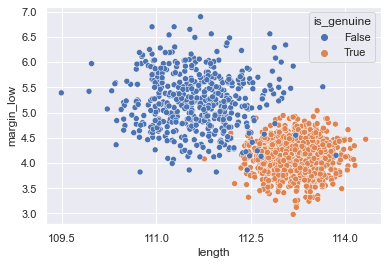

In [8]:
sns.set()

ax = sns.scatterplot(x="length", y="margin_low", data=billets, hue='is_genuine')
ax.set(xlabel='length', ylabel='margin_low')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

Il semble y avoir effectivement une corrélation linéaire négative visuellement.

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

#Séparez les valeurs nulles de la trame de données (billets) et créez une variable "données de test"
#Supprimez les valeurs nulles du bloc de données (billets) et représentez-les en tant que "données d'entraînement
test_data = billets[billets["margin_low"].isnull()] 
billets_rs = billets.copy()
billets_rs.dropna(inplace=True)

#Créez « x_train » et « y_train » à partir des données d'entraînement
x_train = billets_rs[["length"]]
y_train = billets_rs[["margin_low"]]

#Créer le modèle de régression linéaire
rs_lin = LinearRegression()
model_rs_lin = rs_lin.fit(x_train, y_train)

#Créer le x_test à partir des données de test
x_test = test_data[["length"]]

#Appliquez le modèle sur x_test des données de test pour faire des prédictions. 
#Ici, nous avons créé une nouvelle variable 'y_pred'.
y_pred = rs_lin.predict(x_test)
y_pred

array([[4.42755559],
       [4.28056693],
       [4.35659555],
       [4.18426401],
       [4.6455043 ],
       [4.20960688],
       [4.17412686],
       [4.13864684],
       [4.3464584 ],
       [4.3464584 ],
       [4.33632125],
       [3.81932664],
       [3.99165818],
       [4.40221272],
       [4.42755559],
       [4.18426401],
       [4.49851564],
       [4.62016143],
       [4.2856355 ],
       [4.11330397],
       [3.59124078],
       [4.14371541],
       [4.0068639 ],
       [4.18426401],
       [3.90549241],
       [3.97645245],
       [4.43262417],
       [4.48330991],
       [4.13357827],
       [4.89386446],
       [4.63029858],
       [5.18784178],
       [5.22839038],
       [4.68098432],
       [5.6845621 ],
       [5.09660744],
       [5.08647029]])

On vérifie le nombre de valeurs prédites.

In [10]:
len(y_pred)

37

Examinons maintenant les résultats.

In [11]:
reg_simp = smf.ols('margin_low ~ length', data=billets).fit()
print(reg_simp.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     1169.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          8.98e-189
Time:                        10:29:30   Log-Likelihood:                -1045.8
No. Observations:                1463   AIC:                             2096.
Df Residuals:                    1461   BIC:                             2106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.5960      1.670     36.881      0.0

Nous obtenons des statistiques sur les coefficients obtenus : leur valeur, leur écart-type, la statistique de test de Student, et la p-valeur (le test effectué sur le paramètre est ici le test de significativité : le paramètre vaut 0 versus le paramètre est différent de 0), ainsi que des statistiques sur le modèle général ( 𝑅2 ,  𝐴𝐼𝐶 , etc...).

Les p-valeurs sont inférieures à 5 %. À un niveau de test de 5 %, on rejette donc l'hypothèse selon laquelle le paramètre est égal à 0 : les paramètres sont donc significativement différents de 0. Ici, on voit que la variable length est significative.

Quant au  𝑅2 , il est de l'ordre de 0.445. Ce n'est pas très élevé, mais ceci est logique au vu de la dispersion du nuage de points originel.

#### Droite de régression

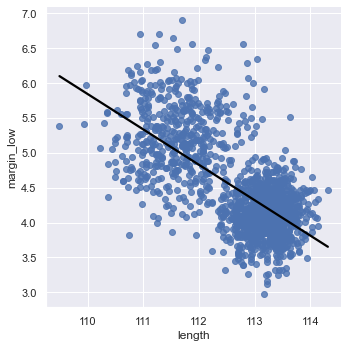

In [12]:
ax = sns.lmplot(x="length", y="margin_low", data=billets, ci=None, line_kws={'color':'black'})
ax.set(xlabel='length', ylabel='margin_low')
plt.show()

#### Représentation des valeurs ajustées (prédites) en fonction des valeurs observées

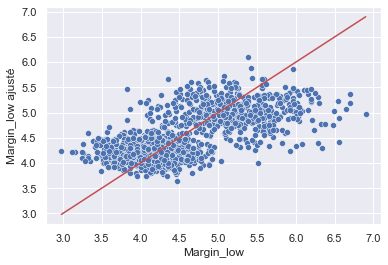

In [13]:
billets_rs['margin_low_ajust'] = reg_simp.predict()

X_plot = [billets_rs['margin_low'].min(), billets_rs['margin_low'].max()]

ax = sns.scatterplot(x="margin_low", y="margin_low_ajust", data=billets_rs)
ax.set(xlabel='Margin_low', ylabel='Margin_low ajusté')
plt.plot(X_plot, X_plot, color='r')
plt.show()

La droite qui s'affiche est la première bissectrice. Si le modèle était parfait, les valeurs réelles et les valeurs ajustées seraient égales, donc sur un tel graphique, les points seraient alignés sur la droite d'équation  𝑦=𝑥 , soit la première bissectrice.

#### Représentation des résidus

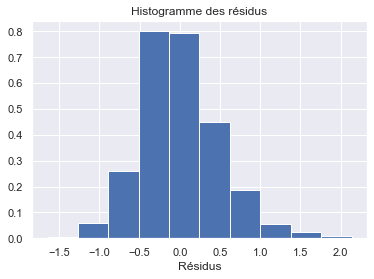

In [14]:
billets_rs['residu_s'] = reg_simp.resid

plt.hist(billets_rs['residu_s'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

L'allure de l'histogramme est plutôt atypique : centrée mais pas symétrique.

#### Avant de choisir quelle régression on utilise (simple ou multiple), regardons maintenant la régression multiple.

### Régression linéaire multiple

In [15]:
reg_multi = smf.ols('margin_low ~ diagonal + height_left + height_right + margin_up + length', data=billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          2.60e-202
Time:                        10:29:31   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

### Analyse des résultats de la régression linéaire multiple

In [16]:
#Nous allons ici réaliser les tests à un niveau  𝛼=5 % :
alpha = 0.05

#Récupérons  𝑛 , le nombre d'individus de l'échantillon, et  𝑝 , le nombre de variables.
n = billets_rs.shape[0]
p = 6

#Nous allons mener des analyses sur les valeurs atypiques et/ou influentes en travaillant sur un dataframe appelé analyses.
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

#### Calcul des leviers

On peut calculer les leviers comme ceci, en sachant que le seuil des leviers est de (2∗p)/n.

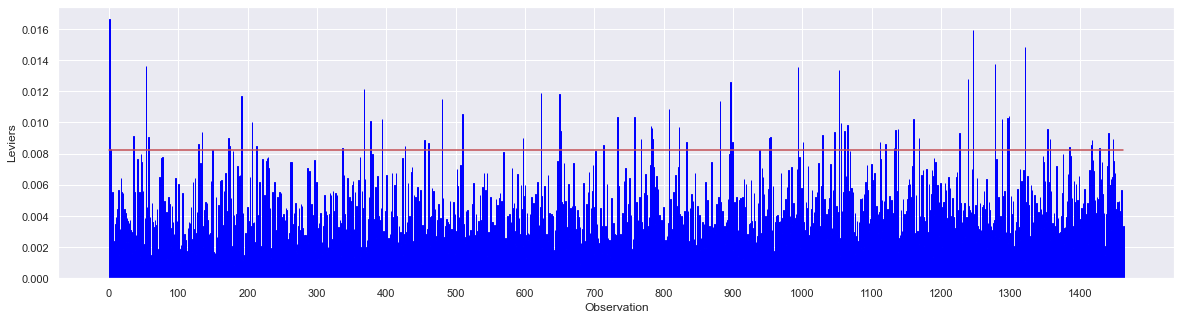

In [17]:
analyses['leviers'] = reg_multi.get_influence().hat_matrix_diag
seuil_levier = (2*p)/n

plt.figure(figsize=(20,5))
plt.bar(analyses['obs'], analyses['leviers'], ec='blue')
plt.xticks(np.arange(0, 1463, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1463], [seuil_levier, seuil_levier], color='r')
plt.show()

Pour sélectionner les points pour lesquels le levier est supérieur au seuil, on exécute la ligne suivante :

In [18]:
analyses.loc[analyses['leviers'] > seuil_levier, :]

,obs,leviers
0,1,0.016606
2,3,0.008298
34,35,0.009156
52,53,0.013635
56,57,0.009087
...,...,...
1416,1417,0.008521
1417,1418,0.008870
1428,1429,0.008390
1441,1442,0.009325


On appelle point levier un point dont la coordonnée sur l’axe X est significativement différente de celles des autres points.
On voit qu'il y a 75 valeurs aytpiques mais comme le levier est faible cela ne semble pas avoir d'incidence sur le modèle.

Dans les statistiques et en particulier dans l'analyse de régression , l'effet de levier est une mesure de la distance entre les valeurs des variables indépendantes d'une observation et celles des autres observations. Les points à effet de levier élevé , le cas échéant, sont des valeurs aberrantes par rapport aux variables indépendantes . Autrement dit, les points à fort effet de levier n'ont pas de points voisins dans{\displaystyle \mathbb{R} ^{p}}\mathbb{R} ^{p}l'espace, où{\style d'affichage {p}}{\style d'affichage {p}}est le nombre de variables indépendantes dans un modèle de régression. Cela rend le modèle ajusté susceptible de passer près d'une observation à effet de levier élevé.Par conséquent, les points à fort effet de levier ont le potentiel de provoquer d'importants changements dans les estimations des paramètres lorsqu'ils sont supprimés, c'est-à-dire d'être des points influents . Bien qu'un point influent ait généralement un effet de levier élevé, un point à effet de levier élevé n'est pas nécessairement un point influent. L'effet de levier est généralement défini comme les éléments diagonaux de la matrice chapeau.

Sources :

https://bookdown.org/teodor_tiplica/book_linearrrgression/ValidModel.html#AnalRES

https://towardsdatascience.com/linear-regression-models-and-influential-points-4ee844adac6d

https://medium.com/codex/outlier-study-and-linear-regression-diagnosis-using-python-d148223859c0

https://towardsdatascience.com/outliers-leverage-residuals-and-influential-observations-df3065a0388e

https://en.wikipedia.org/wiki/Leverage_(statistics)

#### Calcul des résidus studentisés

Si l'on souhaite maintenant calculer les résidus studentisés, nous écrivons ceci, sachant que le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :

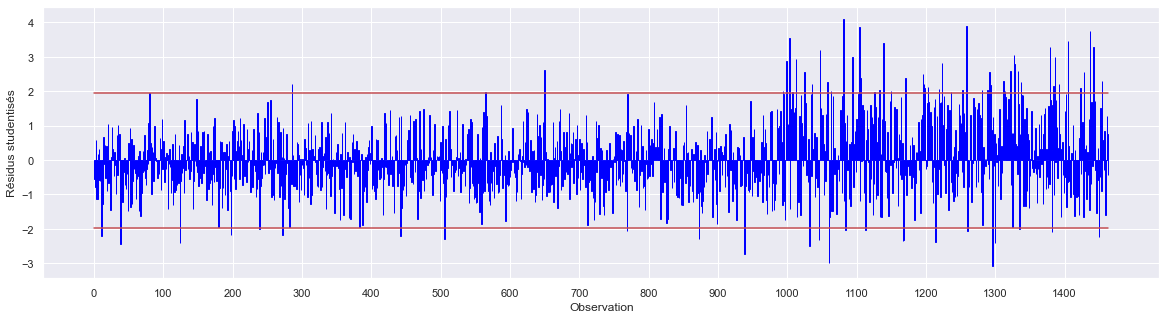

In [19]:
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

plt.figure(figsize=(20,5))
plt.bar(analyses['obs'], analyses['rstudent'], ec='blue')
plt.xticks(np.arange(0, 1463, step=100))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 1463], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1463], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

Rappel : 
    
Le résidu est la différence entre la valeur observée et la valeur prédite.
En régression linéaire, les résidus sont studentisés lorsqu'ils sont divisés par leur écart-type empirique.
Lorsque n est grand les résidus studentisés doivent rester comprise entre −2 et 2.
In a way, it is kind of a student’s t-statistic, with the estimate of error varying between points. This is a very popular technique in outlier detection.


Sources:

https://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire

https://fr.wiktionary.org/wiki/studentis%C3%A9#:~:text=(Statistiques)%20En%20r%C3%A9gression%20lin%C3%A9aire%2C,par%20leur%20%C3%A9cart%2Dtype%20empirique.

Gilbert Saporta, Probabilités, analyse des données et statistique, Éditions Technip, 2006 (2e édition révisée et augmentée (livre)

https://towardsdatascience.com/linear-regression-models-and-influential-points-4ee844adac6d


#### Détermination de la distance de Cook

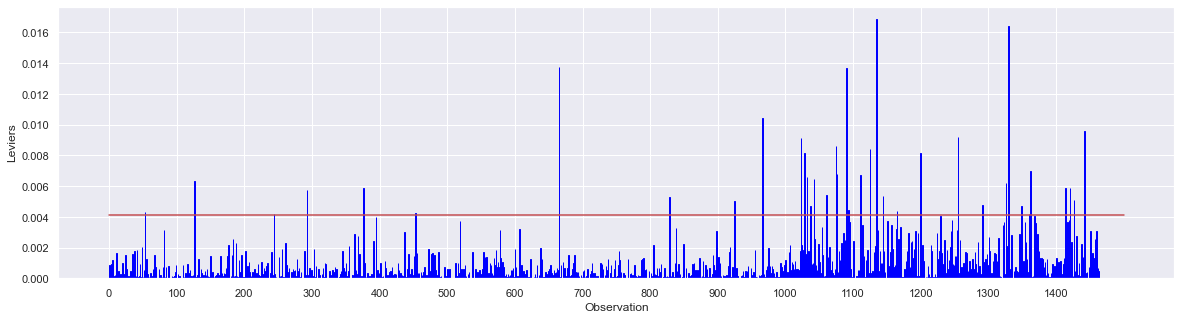

In [20]:
influence = reg_multi.get_influence().summary_frame()

analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 6/(n-p)

plt.figure(figsize=(20,5))
plt.bar(analyses['obs'], analyses['dcooks'], ec='blue')
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1500], [seuil_dcook, seuil_dcook], color='r')
plt.show()

La distance de Cook est également une statistique utilisée pour évaluer l’influence d’un point sur la droite de régression.
Une distance de Cook importante peut être le résultat soit d’un résidu standardisé grand, soit d’un levier important,
soit des deux.

Encore une fois malgré le fait que le seuil soit dépassé, les valeurs sont atypiques puisque le levier est très faible.

Sources:
https://cran.r-project.org/web/packages/olsrr/vignettes/influence_measures.html    


#### Vérifier la colinéarité des variables

Une autre chose à vérifier est l'éventuelle colinéarité approchée des variables :

In [21]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0136128990686315,
 1.1382605736082538,
 1.2301145155560338,
 1.404403778184362,
 1.5769501453665806]

Une erreur fréquente est de confondre multicolinéarité et corrélation. Si des variables colinéaires sont 
de facto fortement corrélées entre elles, deux variables corrélées ne sont pas forcément colinéaires. 
En termes non statistiques, il y a colinéarité lorsque deux ou plusieurs variables mesurent la même chose.
Si tous les FIV sont égaux à 1, il n’existe pas de multicolinéarité, mais si certains FIV sont supérieurs à 1, les prédicteurs sont corrélés. Il n’y a pas de consensus sur la valeur au-delà de laquelle on doit considérer qu’il y a multicolinéarité. Certains auteurs, comme Paul Allison, disent regarder plus en détail les variables avec un FIV supérieur à 2,5. D’autres ne s’inquiètent qu’à partir de 5.

Sources :
https://larmarange.github.io/analyse-R/multicolinearite.html

#### Testez l’homoscédasticité

On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :

In [22]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 7.759535216194938e-16


On parle d'homoscédasticité lorsque la variance des erreurs stochastiques de la régression est la même pour chaque observation 
i (de 1 à n observations).
La notion d'homoscédasticité s'oppose à celle d'hétéroscédasticité, qui correspond au cas où la variance de l'erreur
des variables est différente.
Si la statistique de Breusch-Pagan est supérieure à celle lue dans la table du Chi-Deux pour un certain niveau de risque d'erreur de première espèce (5 % étant la valeur généralement retenue), alors on rejette l'hypothèse nulle d'homoscédasticité.
Ici comme la p-value est inférieur à 5% alors on rejette l'hypothèse nulle d'homoscédasticité.

Sources : 

https://fr.wikipedia.org/wiki/Homosc%C3%A9dasticit%C3%A9

https://fr.wikipedia.org/wiki/Test_de_Breusch-Pagan

#### Testez la normalité des résidus
Si l'on veut tester la normalité des résidus, on peut faire un test de Shapiro-Wilk.

In [23]:
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9857879281044006, pvalue=8.536943374437556e-11)

Comme la p-value est inférieure à un niveau alpha choisi (par exemple 0.05), alors l'hypothèse nulle est rejetée 
(i.e. il est improbable d'obtenir de telles données en supposant qu'elles soient normalement distribuées) et donc les résidus ne suivent pas une loi Normale.

Source :

https://fr.wikipedia.org/wiki/Test_de_Shapiro-Wilk

#### Imputation des données manquantes par régression linéaire multiple

In [24]:
test_data_imp = test_data[["is_genuine","diagonal","height_left","height_right", "margin_up","length"]]
test_data["margin_low"] = reg_multi.predict(test_data_imp)

rlm_final = [test_data, billets_rs]
billets = pd.concat(rlm_final)
billets = billets.drop(["margin_low_ajust", "residu_s"], axis=1)
billets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 72 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


C:\Users\nic_9\AppData\Local\Temp/ipykernel_11176/3160827012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["margin_low"] = reg_multi.predict(test_data_imp)


### Analyse descriptive

#### Description du dataframe billets

In [25]:
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.483475,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.659632,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.020000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


#### On compare les 2 matrices de corrélations (avant et après imputation).

Matrice (avant)

In [26]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\nic_9\AppData\Local\Temp/ipykernel_11176/1928666696.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.00,0.13,-0.38,-0.49,-0.78,-0.61,0.85
diagonal,0.13,1.00,0.02,-0.02,-0.11,-0.06,0.10
height_left,-0.38,0.02,1.00,0.24,0.30,0.25,-0.32
height_right,-0.49,-0.02,0.24,1.00,0.39,0.31,-0.40
margin_low,-0.78,-0.11,0.30,0.39,1.00,0.43,-0.67
margin_up,-0.61,-0.06,0.25,0.31,0.43,1.00,-0.52
length,0.85,0.10,-0.32,-0.40,-0.67,-0.52,1.00


Matrice (après)

In [27]:
#On affiche la matrice de corrélations entre les variables
corr2 = billets.corr()
corr2.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\nic_9\AppData\Local\Temp/ipykernel_11176/260940728.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr2.style.background_gradient(cmap='coolwarm').set_precision(2)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.00,0.13,-0.38,-0.49,-0.78,-0.61,0.85
diagonal,0.13,1.00,0.02,-0.02,-0.11,-0.06,0.10
height_left,-0.38,0.02,1.00,0.24,0.31,0.25,-0.32
height_right,-0.49,-0.02,0.24,1.00,0.39,0.31,-0.40
margin_low,-0.78,-0.11,0.31,0.39,1.00,0.43,-0.67
margin_up,-0.61,-0.06,0.25,0.31,0.43,1.00,-0.52
length,0.85,0.10,-0.32,-0.40,-0.67,-0.52,1.00


Deux cases semblent avoir changé et de très peu (corrélation entre margin_low et height_left)

#### Pairplot

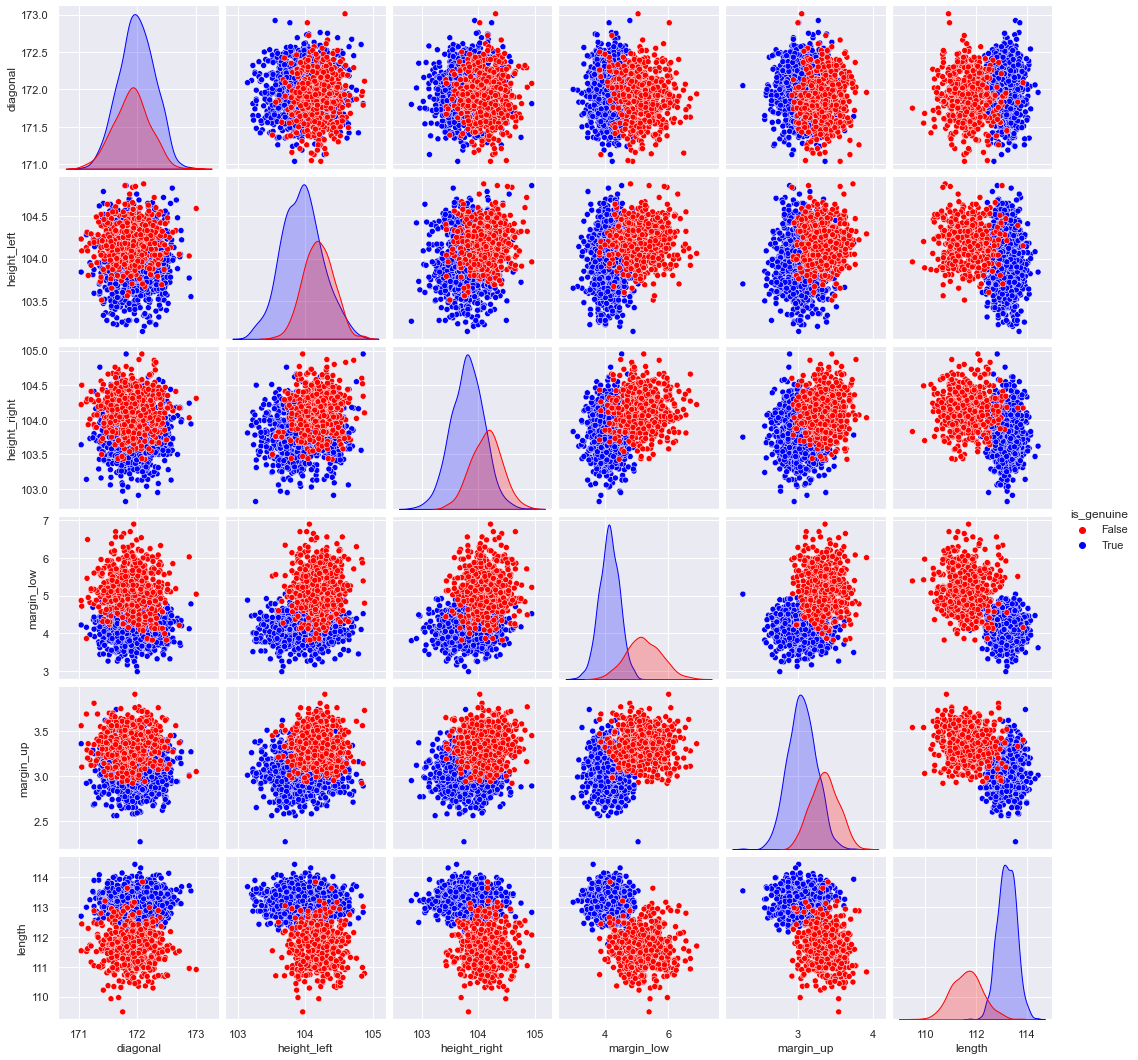

In [28]:
sns.pairplot(billets, hue="is_genuine", palette=['red', 'blue'])

On remarque que ce sont les variables length et margin_low qui permettent de différencier les vrais des faux billets.

### Analyse en composantes principales

In [29]:
#On définit la variable qualitative en index et on revérifie
billets.set_index('is_genuine', inplace = True)
billets.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
True,171.94,103.89,103.45,4.318525,3.25,112.79
True,171.93,104.07,104.18,4.393668,3.14,113.08
True,172.07,103.80,104.38,4.410457,3.02,112.93
True,171.45,103.66,103.80,4.319014,3.62,113.27
True,171.83,104.14,104.06,4.650617,3.02,112.36


#### Data Split

In [30]:
#On va séparer nos données
X = billets.values
print(X)
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print(X.shape)
print("--------------------------------------------------------")
print("--------------------------------------------------------")
names = billets.index
print(names)
print("--------------------------------------------------------")
print("--------------------------------------------------------")
features = billets.columns
print(features)

[[171.94       103.89       103.45         4.31852466   3.25
  112.79      ]
 [171.93       104.07       104.18         4.39366755   3.14
  113.08      ]
 [172.07       103.8        104.38         4.41045663   3.02
  112.93      ]
 ...
 [171.8        104.01       104.12         5.51         3.36
  111.95      ]
 [172.06       104.28       104.06         5.17         3.46
  112.25      ]
 [171.47       104.15       103.82         4.63         3.37
  112.07      ]]
--------------------------------------------------------
--------------------------------------------------------
(1500, 6)
--------------------------------------------------------
--------------------------------------------------------
Index([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
       ...
       False, False, False, False, False, False, False, False, False, False],
      dtype='object', name='is_genuine', length=1500)
--------------------------------------------------------
-----------------

#### Scaling

In [31]:
#Commençons par scaler les données

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [32]:
#On transforme
X_scaled = scaler.transform(X)

#Rappelons qu'on peut faire les 2 opérations en une seule :
X_scaled = scaler.fit_transform(X)

#On espère avoir une moyenne à 0 et un écart type à 1 :
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5
mean,0.0,0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


In [33]:
#On va travailler sur les 6 premières composantes
n_components = 6

#On instancie notre ACP
pca = PCA(n_components=n_components)

#On l'entraîne sur nos données scalées
pca.fit(X_scaled)

PCA(n_components=6)

#### Explained variance and scree plot

In [34]:
#Intéressons nous maintenant à la variance captée par chaque nouvelle composante
#Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_
pca.explained_variance_ratio_

array([0.43288253, 0.16956616, 0.13025062, 0.11824871, 0.09602704,
       0.05302493])

In [35]:
#Enregistrons cela dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([43.29, 16.96, 13.03, 11.82,  9.6 ,  5.3 ])

In [36]:
#On fait une somme cumulée
scree_cum = scree.cumsum().round()
scree_cum

array([ 43.,  60.,  73.,  85.,  95., 100.])

In [37]:
#Définisons ensuite une variable avec la liste de nos composantes :
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

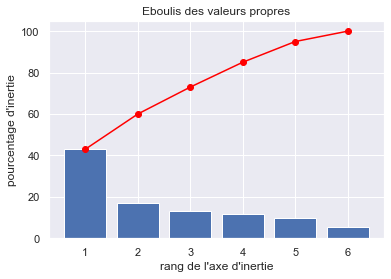

In [38]:
#On peut l'afficher graphiquement
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

#### Components

In [39]:
#Intéressons nous maintenant à nos fameuses composantes
#La formule de ce calcul nous est donnée par l'attribut components_. Cette variable est généralement nommée pcs :
pcs = pca.components_
pcs

array([[-0.08469767,  0.33063448,  0.39355544,  0.50769282,  0.4394146 ,
        -0.52705225],
       [ 0.94130387,  0.30752844,  0.10833184, -0.07243963, -0.00495445,
         0.04863598],
       [-0.28784296,  0.88504887, -0.16356327, -0.10904608, -0.27011168,
         0.14909938],
       [-0.10196124, -0.04924399,  0.86656155, -0.08927108, -0.44404699,
         0.17636033],
       [-0.11599182,  0.10165163,  0.23599848, -0.56408757,  0.71198772,
         0.30886283],
       [ 0.0083408 ,  0.00613019,  0.00109087,  0.6316212 ,  0.17270117,
         0.75572523]])

In [40]:
# Affichons la même chose mais version pandas
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5
0,-0.084698,0.330634,0.393555,0.507693,0.439415,-0.527052
1,0.941304,0.307528,0.108332,-0.072440,-0.004954,0.048636
2,-0.287843,0.885049,-0.163563,-0.109046,-0.270112,0.149099
3,-0.101961,-0.049244,0.866562,-0.089271,-0.444047,0.176360
4,-0.115992,0.101652,0.235998,-0.564088,0.711988,0.308863
5,0.008341,0.006130,0.001091,0.631621,0.172701,0.755725


In [41]:
#Intéressant... Mais pas encore très clair... Continuons le travail
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,diagonal,height_left,height_right,margin_low,margin_up,length
F1,-0.08,0.33,0.39,0.51,0.44,-0.53
F2,0.94,0.31,0.11,-0.07,-0.00,0.05
F3,-0.29,0.89,-0.16,-0.11,-0.27,0.15
F4,-0.10,-0.05,0.87,-0.09,-0.44,0.18
F5,-0.12,0.10,0.24,-0.56,0.71,0.31
F6,0.01,0.01,0.00,0.63,0.17,0.76


In [42]:
#Dans certains cas, on voudra afficher ce dataframe comme cela
pcs.T

,F1,F2,F3,F4,F5,F6
diagonal,-0.084698,0.941304,-0.287843,-0.101961,-0.115992,0.008341
height_left,0.330634,0.307528,0.885049,-0.049244,0.101652,0.006130
height_right,0.393555,0.108332,-0.163563,0.866562,0.235998,0.001091
margin_low,0.507693,-0.072440,-0.109046,-0.089271,-0.564088,0.631621
margin_up,0.439415,-0.004954,-0.270112,-0.444047,0.711988,0.172701
length,-0.527052,0.048636,0.149099,0.176360,0.308863,0.755725


<AxesSubplot:>

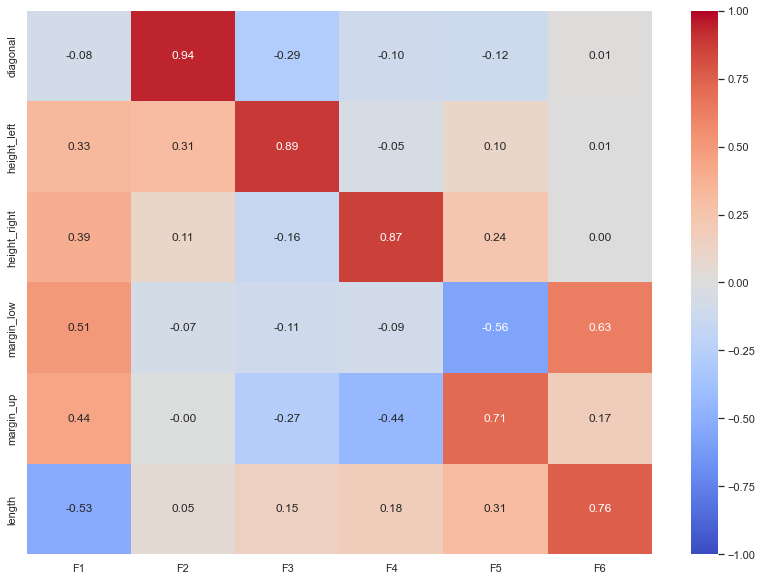

In [43]:
#Et pour une représentation visuelle comme cela
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

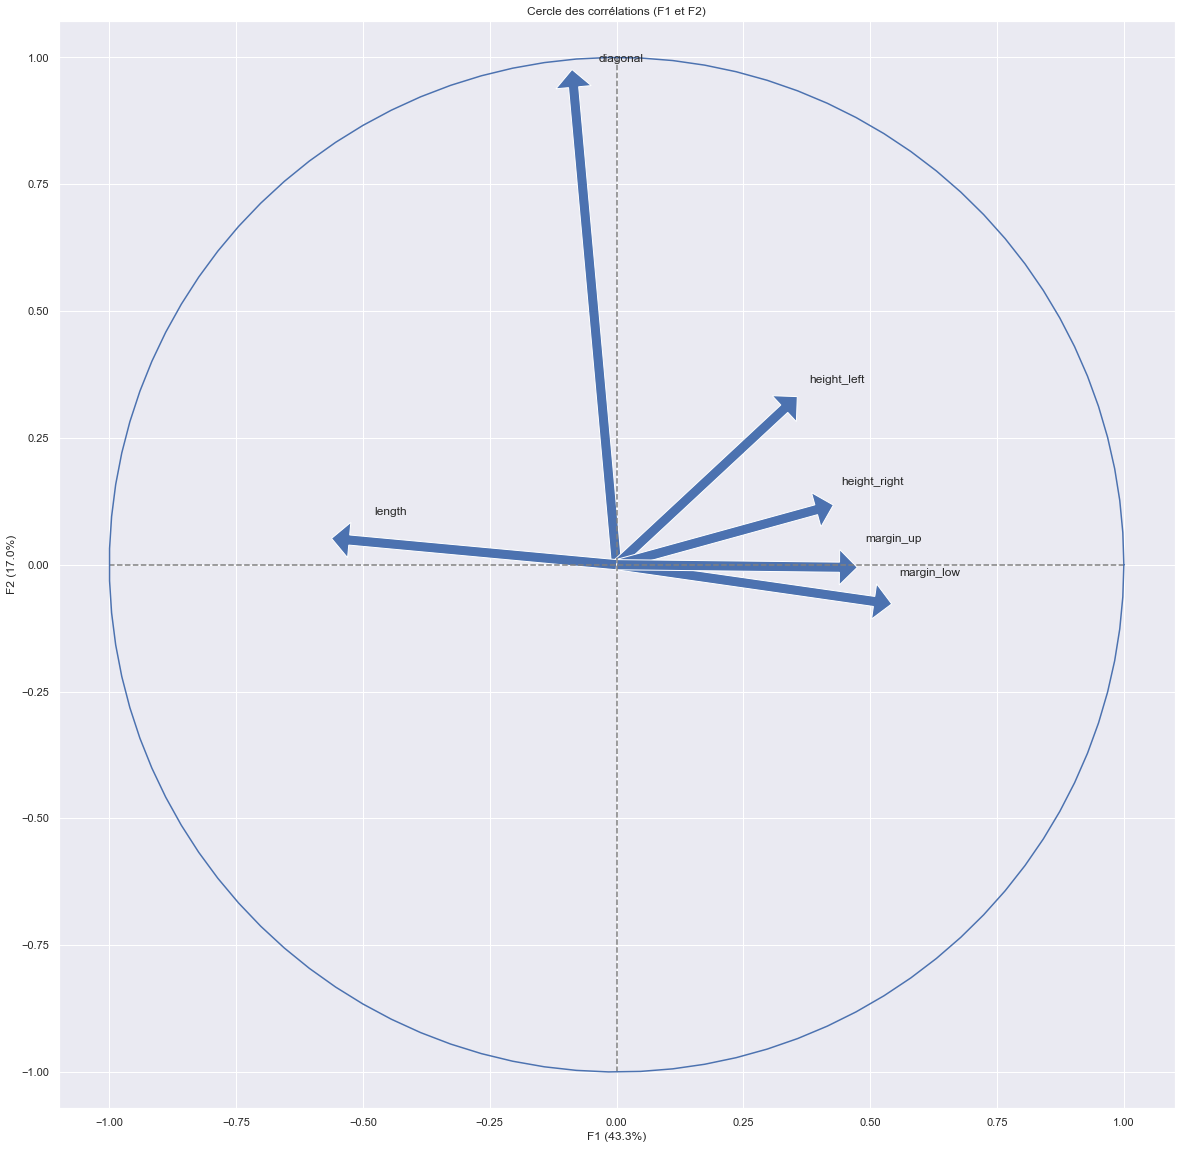

In [44]:
#Définissons nos axes x et y.
#Nous allons utiliser les 2 premières composantes.
#Comme - en code - on commence à compter à partir de 0, cela nous donne :

x, y = 0,1

#Pour la partie graphique

fig, ax = plt.subplots(figsize=(20, 20))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.035, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

#### Projection

In [45]:
#Travaillons maintenant sur la projection de nos individus. 
#Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace
X_proj = pca.transform(X_scaled)

In [46]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en un df
    X_ = pd.DataFrame(X_projected)
    
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # On définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] =  clusters if clusters is not None else "None" 
    X_["labels"] =  labels if labels is not None else "None"
    c_unique_list = X_["clusters"].sort_values().unique()
    c_dict = {j:i+1 for i, j in enumerate(c_unique_list)}
    X_["colors"] = X_["clusters"].apply(lambda i : c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()) : 
        # On selectionne le sous DF
        sub_X =X_.loc[X_.clusters == c, : ]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        # On affiche les points
        ax.scatter(    sub_X.iloc[:, x], 
                        sub_X.iloc[:, y], 
                        alpha=alpha, 
                        label = cluster ,
                        cmap="Set1", 
                        marker=marker)
        
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() *1.1
    y_max = np.abs(X_.iloc[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if labels is not None :
        for i,(x,y) in enumerate(X_projected[:,[0,1]]):
            plt.text(x, y, labels[i], fontsize='13')

    # Titre, legend et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    if clusters is not None: 
        plt.legend()
    plt.show()


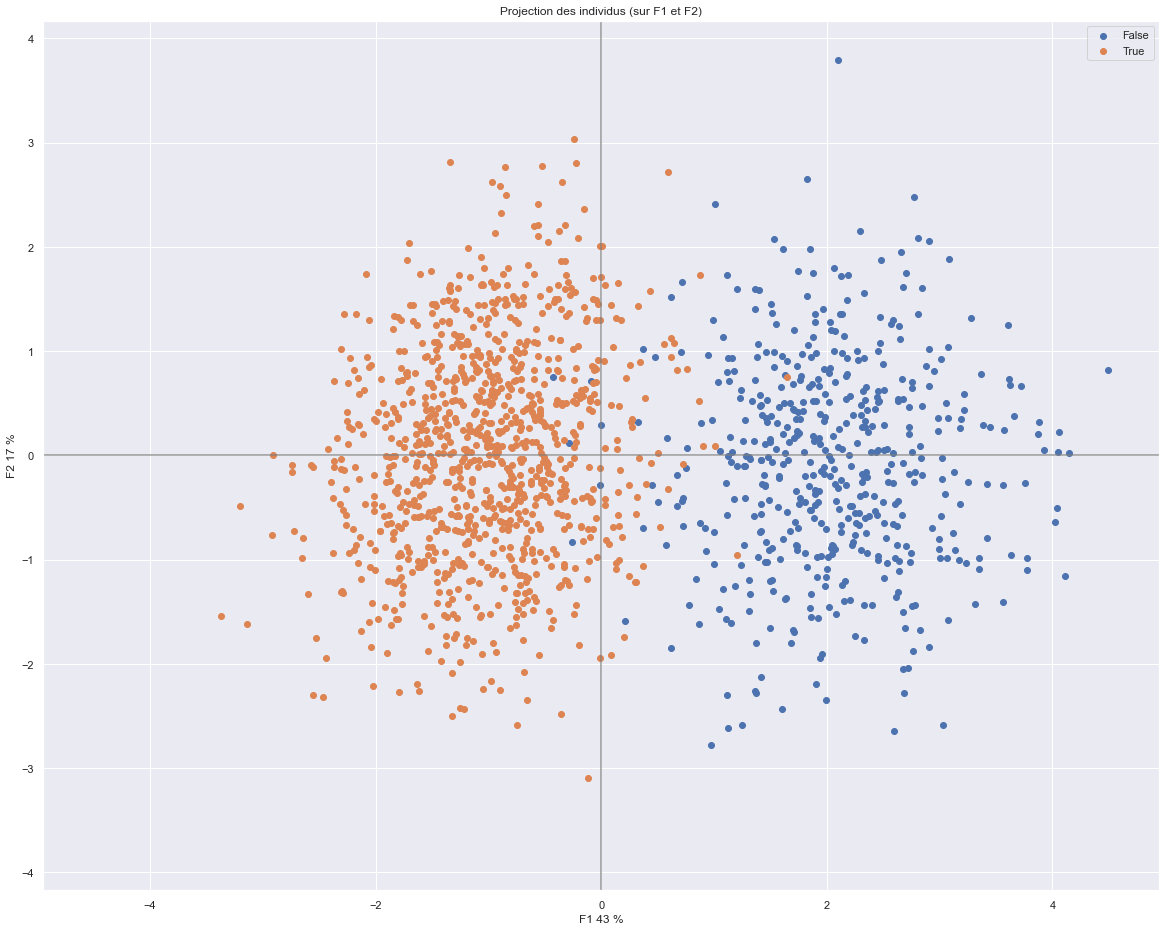

In [47]:
#Essayons la version plus élaborée avec F1 et F2
display_factorial_planes(X_proj, [0, 1], pca, clusters=billets.index, figsize=(20,16), marker="o")

### Clustering

#### Méthode du coude pour déterminer le nombre de cluster

C:\Users\nic_9\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


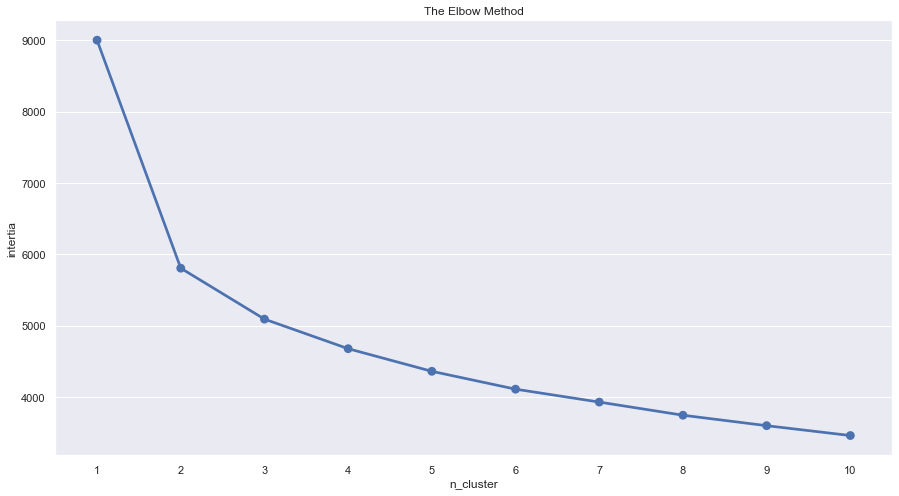

In [48]:
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_scaled)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster cente
# Plot SSE for each *k*
plt.figure(figsize=(15,8))
plt.title('The Elbow Method')
plt.xlabel('n_cluster'); plt.ylabel('intertia')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

plt.show()

Le résultat est parfait car on veut justement deux groupes : les vrais billets et les faux billets.

In [49]:
#Exécution du k-means

kmeans = KMeans(n_clusters=2).fit(X_scaled)
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [50]:
#On récupère les labels
billets['cluster'] = kmeans.labels_

In [51]:
billets.head(50)

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
is_genuine,,,,,,,
True,171.94,103.89,103.45,4.318525,3.25,112.79,0
True,171.93,104.07,104.18,4.393668,3.14,113.08,0
True,172.07,103.80,104.38,4.410457,3.02,112.93,0
True,171.45,103.66,103.80,4.319014,3.62,113.27,0
True,171.83,104.14,104.06,4.650617,3.02,112.36,0
True,171.80,103.26,102.82,3.803308,2.95,113.22,0
True,171.92,103.83,103.76,4.179736,3.23,113.29,0
True,171.85,103.70,103.96,4.127442,3.00,113.36,0
True,172.56,103.72,103.51,4.135034,3.12,112.95,0


#### Affichage des individus (billets) sur le premier plan factoriel

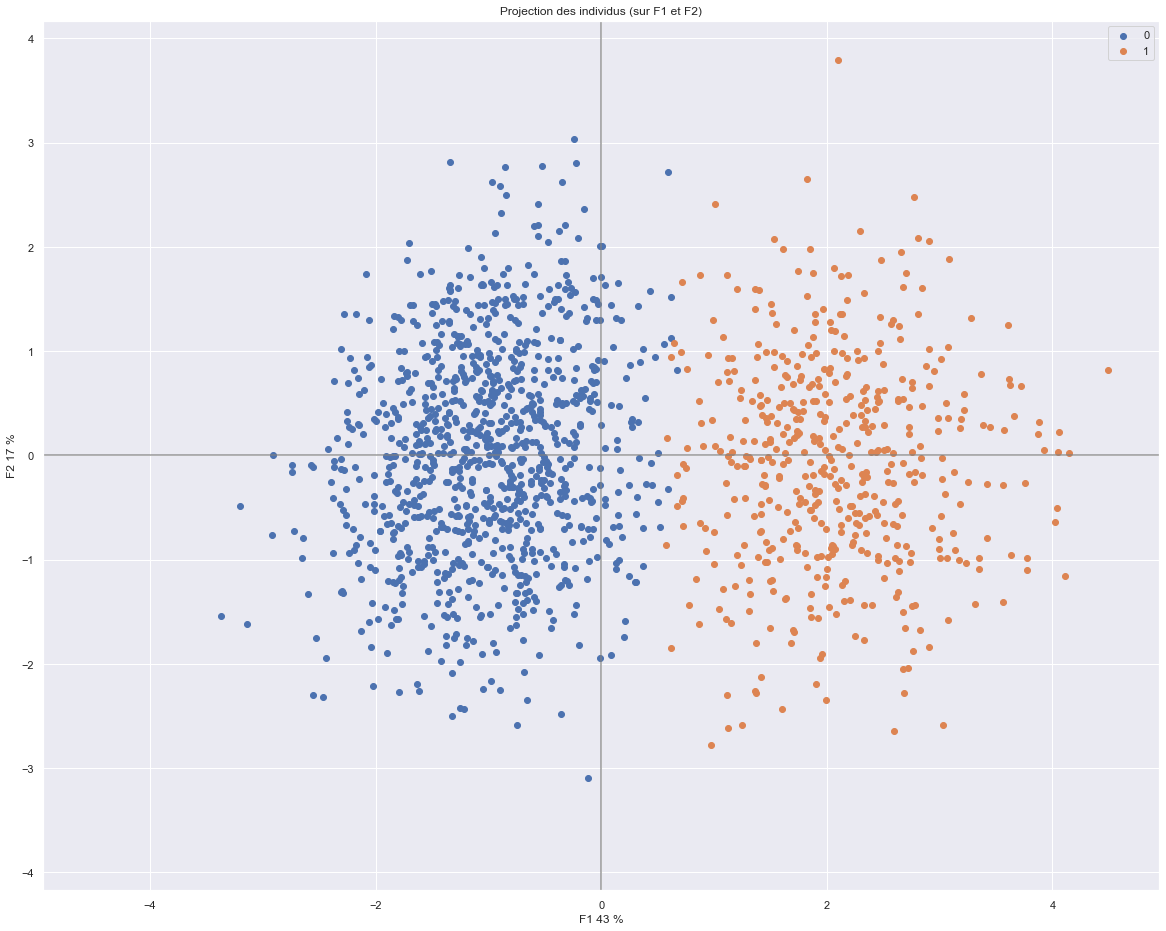

In [52]:
billets.reset_index(inplace=True)
#Essayons la version plus élaborée avec F1 et F2
display_factorial_planes(X_proj, [0, 1], pca, clusters=billets.cluster, figsize=(20,16), marker="o")


Le graphique semble un peu différent du précédent.

#### Matrice de confusion du K-means

In [53]:
import sklearn as sk
from sklearn.metrics import confusion_matrix
#Attention il faut inverser les clusters attribués
billets = billets.replace({0:1, 1:0})
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,True,171.94,103.89,103.45,4.318525,3.25,112.79,1
1,True,171.93,104.07,104.18,4.393668,3.14,113.08,1
2,True,172.07,103.80,104.38,4.410457,3.02,112.93,1
3,True,171.45,103.66,103.80,4.319014,3.62,113.27,1
4,True,171.83,104.14,104.06,4.650617,3.02,112.36,1


Source : https://stackoverflow.com/questions/56078203/why-scikit-learn-confusion-matrix-is-reversed

<AxesSubplot:>

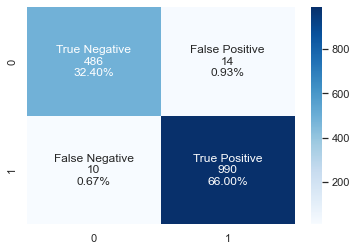

In [54]:
cf_matrix = confusion_matrix(billets['is_genuine'], billets['cluster'])
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [55]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("La Spécificité est de:", precision_score(billets["is_genuine"], billets["cluster"]),".")
print("La Sensibilité est de:", recall_score(billets["is_genuine"], billets["cluster"]), ".")
print("Le Score F1 est de:", f1_score(billets["is_genuine"], billets["cluster"]), ".")
print("La Précision est de :", accuracy_score(billets["is_genuine"], billets["cluster"]), ".")

La Spécificité est de: 0.9860557768924303 .
La Sensibilité est de: 0.99 .
Le Score F1 est de: 0.9880239520958083 .
La Précision est de : 0.984 .


Rappel :
    
L'accuracy (ou précision) est le nombre de prédictions correctes faites par le modèle sur toutes sortes de prédictions faites.
L’accuracy est une bonne mesure lorsque les classes de variables cibles dans les données sont presque équilibrées.

La precision (ou spécificité) est la fraction de vrais billets positifs parmi tous les billets positifs (donc détectés comme étant authentiques).

Le recall (ou sensibilité) mesure la fraction de billets détectés comme étant authentiques parmi tous les billets qui sont effectivement authentiques.

Le score F1 représente la moyenne de sensiblité et spécificité.


Source : https://complex-systems-ai.com/analyse-des-donnees/metriques-pour-la-classification/#Exactitude-accuracy

### Régression logistique (modélisation)

In [56]:
#On affiche billets pour sélectionner les colonnes intéressantes
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,True,171.94,103.89,103.45,4.318525,3.25,112.79,1
1,True,171.93,104.07,104.18,4.393668,3.14,113.08,1
2,True,172.07,103.80,104.38,4.410457,3.02,112.93,1
3,True,171.45,103.66,103.80,4.319014,3.62,113.27,1
4,True,171.83,104.14,104.06,4.650617,3.02,112.36,1


In [57]:
#Sélection des colonnes

X = billets.copy()
X = X.iloc[:, 1:7]
y = billets.iloc[:, 0]

X - Caractéristiques : (également appelées prédicteurs, entrées ou attributs) ce sont simplement les variables de nos données. Ils peuvent être plus d'un et donc représentés par une matrice de caractéristiques ('X' est une notation courante pour représenter la matrice de caractéristiques). Une liste de tous les noms de fonctionnalités est appelée noms de fonctionnalités.

y - Réponse : (également appelée cible, étiquette ou sortie) Il s'agit de la variable de sortie en fonction des variables de fonctionnalité. Nous avons généralement une seule colonne de réponse et elle est représentée par un vecteur de réponse ("y" est une notation courante pour représenter le vecteur de réponse). Toutes les valeurs possibles prises par un vecteur de réponse sont appelées noms de cible.

Source : https://www.geeksforgeeks.org/learning-model-building-scikit-learn-python-machine-learning-library/

In [58]:
X.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.94,103.89,103.45,4.318525,3.25,112.79
1,171.93,104.07,104.18,4.393668,3.14,113.08
2,172.07,103.80,104.38,4.410457,3.02,112.93
3,171.45,103.66,103.80,4.319014,3.62,113.27
4,171.83,104.14,104.06,4.650617,3.02,112.36


In [59]:
y.head()

0    True
1    True
2    True
3    True
4    True
Name: is_genuine, dtype: bool

In [60]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [61]:
#on vérifie le nombre de lignes
print('X_train a', len(X_train), 'lignes.',
    '\ny_train a', len(y_train), 'lignes.',
    '\nX_test a', len(X_test), 'lignes.',
    '\ny_test a', len(y_test), 'lignes.')

X_train a 1125 lignes. 
y_train a 1125 lignes. 
X_test a 375 lignes. 
y_test a 375 lignes.


In [62]:
#On entraine le modèle
from sklearn.linear_model import LogisticRegression
modele = LogisticRegression()
modele.fit(X_train, y_train)

LogisticRegression()

In [63]:
#On examine et teste le modele
y_lr = modele.predict(X_test)

<AxesSubplot:>

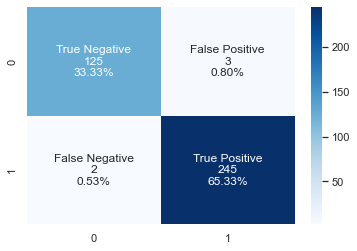

In [64]:
#On évalue le modèle 
cf_matrix = confusion_matrix(y_test, y_lr)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [65]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_lr, digits=4)
print(report)

              precision    recall  f1-score   support

       False     0.9843    0.9766    0.9804       128
        True     0.9879    0.9919    0.9899       247

    accuracy                         0.9867       375
   macro avg     0.9861    0.9842    0.9851       375
weighted avg     0.9867    0.9867    0.9867       375



Rappel :

L'accuracy (ou précision) est le nombre de prédictions correctes faites par le modèle sur toutes sortes de prédictions faites. L’accuracy est une bonne mesure lorsque les classes de variables cibles dans les données sont presque équilibrées.

La precision (ou spécificité) est la fraction de vrais billets positifs parmi tous les billets positifs (donc détectés comme étant authentiques).

Le recall (ou sensibilité) mesure la fraction de billets détectés comme étant authentiques parmi tous les billets qui sont effectivement authentiques.

Le score F1 représente la moyenne de sensiblité et spécificité.

### KNN (K-Nearest Neighbors) / Méthode des K plus proches voisins

In [66]:
# training the model on training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
 
# making predictions on the testing set
y_knn = knn.predict(X_test)

<AxesSubplot:>

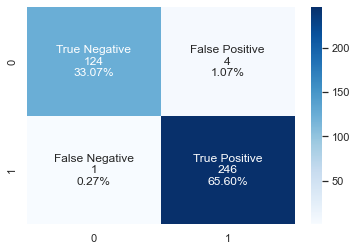

In [67]:
#On évalue le modèle 
cf_matrix = confusion_matrix(y_test, y_knn)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [68]:
report = classification_report(y_test, y_knn, digits=4)
print(report)

              precision    recall  f1-score   support

       False     0.9920    0.9688    0.9802       128
        True     0.9840    0.9960    0.9899       247

    accuracy                         0.9867       375
   macro avg     0.9880    0.9824    0.9851       375
weighted avg     0.9867    0.9867    0.9866       375



Rappel :

L'accuracy (ou précision) est le nombre de prédictions correctes faites par le modèle sur toutes sortes de prédictions faites. L’accuracy est une bonne mesure lorsque les classes de variables cibles dans les données sont presque équilibrées.

La precision (ou spécificité) est la fraction de vrais billets positifs parmi tous les billets positifs (donc détectés comme étant authentiques).

Le recall (ou sensibilité) mesure la fraction de billets détectés comme étant authentiques parmi tous les billets qui sont effectivement authentiques.

Le score F1 représente la moyenne de sensiblité et spécificité.

### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

alg_dt = RandomForestClassifier(n_estimators=1, max_depth=60, n_jobs=-1)
dt_model = alg_dt.fit(X_train, y_train)

In [70]:
y_dt = dt_model.predict(X_test)

<AxesSubplot:>

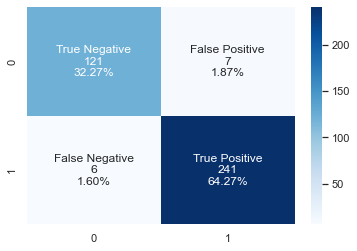

In [71]:
#On évalue le modèle 
cf_matrix = confusion_matrix(y_test, y_dt)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [72]:
report = classification_report(y_test, y_dt, digits=4)
print(report)

              precision    recall  f1-score   support

       False     0.9528    0.9453    0.9490       128
        True     0.9718    0.9757    0.9737       247

    accuracy                         0.9653       375
   macro avg     0.9623    0.9605    0.9614       375
weighted avg     0.9653    0.9653    0.9653       375



Rappel :

L'accuracy (ou précision) est le nombre de prédictions correctes faites par le modèle sur toutes sortes de prédictions faites. L’accuracy est une bonne mesure lorsque les classes de variables cibles dans les données sont presque équilibrées.

La precision (ou spécificité) est la fraction de vrais billets positifs parmi tous les billets positifs (donc détectés comme étant authentiques).

Le recall (ou sensibilité) mesure la fraction de billets détectés comme étant authentiques parmi tous les billets qui sont effectivement authentiques.

Le score F1 représente la moyenne de sensiblité et spécificité.

In [73]:
billets.to_csv('billets_complet.csv')